<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-01-07-glm-gamma-regression-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)


# 7. Gamma Regression

Gamma regression is a powerful statistical method for modeling positive, continuous data with a skewed distribution, particularly when variability increases with the mean. It is commonly used in insurance claims, healthcare costs, and rainfall data, where values are non-negative and right-skewed. This tutorial will explore Gamma regression in R through two main approaches. First, we will manually build a Gamma regression model to understand its underlying mechanics, including the log-likelihood function and parameter optimization. Then, we will utilize R's built-in `lm ()` function to simplify the modeling process and demonstrate practical result interpretation. By the end of this tutorial, you will understand how to apply Gamma regression to real-world data by coding from scratch and using R's built-in functions.

## Overview

Gamma regression is used for modeling positive, continuous data where the variance increases with the mean. It assumes that the response variable $y$ follows a Gamma distribution, often appropriate for modeling non-negative skewed data, such as response times, rainfall, or insurance claims. Here's a step-by-step explanation:

***Understanding the Gamma Distribution***

The Gamma distribution is defined by two parameters: - **Shape parameter** ($k$): Controls the shape or skewness. - **Rate parameter** ($theta$): Controls the spread.

The probability density function (PDF) of the Gamma distribution for a positive variable $y$ is:

$$ f(y; k, \theta) = \frac{y^{k - 1} e^{-\frac{y}{\theta}}}{\theta^k \Gamma(k)} $$

where $\Gamma(k)$ is the Gamma function, and both $k$ and $\theta$ are positive.

In Gamma regression, we typically work with the **mean** $\mu = k\theta$, rather than the shape and rate parameters directly. So, for a response variable $y$, we model $y \sim \text{Gamma}(\mu, \theta)$.

***Defining the Mean-Variance Relationship***

A key property of the Gamma distribution is that:

-   The **mean** of $y$ is $\mu$. -
-   The **variance** of $y$ is $\text{Var}(y) = \theta \mu^2$.

This means the variance grows with the square of the mean, which is helpful for modeling heteroscedastic data where larger values tend to have greater variance.

***Specifying the Link Function***

In Gamma regression, we assume that the mean $\mu$ of the response variable depends on the predictor variables $X$ through a **link function** $g(\cdot)$:

$$ g(\mu) = X \beta $$

Common choices for \$$g(\cdot)$ are:

-   **Log link**: $g(\mu) = \log(\mu)$

-   **Inverse link**: $g(\mu) = \frac{1}{\mu}$

The log link is the most common, ensuring that the predicted mean $\mu$ is always positive. With the log link, we get:

$\log(\mu) = X \beta \Rightarrow \mu = e\^{X \beta}$

***Setting Up the Likelihood Function***

Given $y_i$ as an observation from a Gamma distribution with mean $\mu_i$, we define the likelihood function based on the Gamma PDF. For (n) observations, the joint likelihood $L(\beta)$ is:

$$ L(\beta) = \prod\_{i=1}\^n \frac{y_i^{k - 1} e^{-\frac{y_i}{\theta}}}{\theta^k \Gamma(k)} $$

In practice, we usually work with the **log-likelihood**, which for a Gamma-distributed $y_i$ with mean $\mu_i$ can be expressed as:

$$ \log L(\beta) = \sum_{i=1}^n \left( (k - 1) \log(y_i) - \frac{y_i}{\theta} - k \log(\theta) - \log(\Gamma(k)) \right)  $$

***Estimating the Parameters***

To estimate $\beta$, we maximize the log-likelihood function with respect to $\beta$ using an iterative optimization algorithm, such as **iteratively reweighted least squares (IRLS)** in a generalized linear model (GLM) framework.

For example, with the log link function, we solve for ( \beta ) by maximizing:

$$ \sum_{i=1}^n \left( (k - 1) \log(y_i) - \frac{y_i}{e^{X_i \beta} \cdot k} - k \log(\theta) - \log(\Gamma(k)) \right)  $$

Using statistical software, you can estimate $\beta$ without calculating derivatives manually, as most packages handle this for you.

***Making Predictions***

Once the parameters $\beta$ are estimated, predictions can be made using the fitted model:

$$ \hat{\mu} = e^{X \hat{\beta}} $$

 ***When to Use Gamma Regression***

_ Gamma regression is typically suitable when: - The response variable is positive and continuous. - The data is right-skewed (meaning that there are more lower values, with a few higher outliers). - The variance increases with the mean, which is common in real-world data, especially in economics and biological sciences.

- In cases where these conditions are met, a Gamma regression model can accurately capture the data’s behavior, offering a flexible approach for prediction and inference.

Here are some common types of data and use cases where Gamma regression is a good choice:

1. **Monetary Data (Costs, Claims, Expenses)**

-   **Insurance claims**: The size of insurance claims often follows a Gamma-like distribution since claims are always positive and skewed, with few very high claims.
-   **Healthcare costs**: Medical expenses for treatments or hospital stays often have a Gamma distribution, with many low-cost cases and fewer high-cost ones.
-   **Sales or revenue data**: Especially for per-customer sales or revenue data, where amounts tend to vary widely and have a positive skew.

2. **Duration or Survival Data**

-   **Time until an event**: For example, time until an employee leaves a job (employee turnover), or time until a product breaks or needs repair.
-   **Waiting times**: For instance, waiting times in queues, customer service, or transportation are often positive, with a few very long waits.

3. **Biological and Environmental Measurements**

-   **Reaction times**: In psychology and neuroscience, reaction times are often Gamma-distributed, as they are positive, continuous, and can vary widely.
-   **Rainfall amounts**: Daily rainfall amounts are non-negative and positively skewed, with many days of low rainfall and a few days with very high amounts.
-   **Chemical concentration levels**: The concentration of a particular chemical in samples, which might have a skewed, positive distribution.

 4. **Reliability and Engineering Data**

-   **Failure times**: In engineering and reliability studies, the time until a component or system fails is often modeled with a Gamma distribution.
-   **Load data**: The amount of load or stress a system can handle before failure, which can vary and has a skewed distribution.

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314965 sha256=4989336ced7c0025fde89f266905b2b9f26082addaec1ede7399d2607bca1ed4
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gamma Regression Model from Scratch

Sure, let’s walk through creating a Gamma regression model in R from scratch, without any packages. We'll:

1.  Generate synthetic data that follows a Gamma distribution.
2.  Set up a simple Gamma regression model using a log link function.
3.  Implement the model's parameter estimation using maximum likelihood.

Here’s the code, along with an explanation of each step.

### Generate Synthetic Gamma Data

We'll generate synthetic data where the response variable $y$ is Gamma-distributed, with the mean modeled as a function of a predictor variable $x$ and some known coefficients.

In [ ]:
%%R
# Set a seed for reproducibility
set.seed(42)

# Generate predictor variable `x`
n <- 100
x <- runif(n, 0, 5)  # x ranges from 0 to 5

# Define true coefficients for the linear model (log-link)
beta0 <- 1.5  # Intercept
beta1 <- 0.5  # Slope

# Calculate mean response based on x and the coefficients, with log link
mu <- exp(beta0 + beta1 * x)

# Define shape parameter for the Gamma distribution
k <- 2  # shape parameter for the Gamma distribution

# Generate response variable `y` with Gamma distributed noise
y <- rgamma(n, shape = k, rate = k / mu)  # rate = shape / mean

### Define the Log-Likelihood Function

To estimate the coefficients $\beta$ of the Gamma regression model, we need to define the log-likelihood function. We will only need the terms involving $\beta$, where $\mu_i = e^{X \beta}$. The log-likelihood function for a single observation $y_i$ is:

In [ ]:
%%R
# Define the log-likelihood function for Gamma regression
log_likelihood <- function(beta) {
  # Calculate the predicted mean (log-link function)
  mu_pred <- exp(beta[1] + beta[2] * x)

  # Calculate the log-likelihood for each observation and sum
  ll <- sum(dgamma(y, shape = k, rate = k / mu_pred, log = TRUE))
  return(-ll)  # Return negative log-likelihood for minimization
}

### Estimate Parameters by Maximizing the Log-Likelihood

Now we’ll use `optim()` to minimize the negative log-likelihood and estimate the coefficients $\beta_0$ and $\beta_1$.

In [ ]:
%%R
# Initial guesses for beta coefficients
initial_guess <- c(0, 0)

# Use optim to find the values of beta that minimize the negative log-likelihood
result <- optim(par = initial_guess, fn = log_likelihood)

# Extract estimated coefficients
beta_est <- result$par
cat("Estimated coefficients:\n")
cat("beta0 (Intercept):", beta_est[1], "\n")
cat("beta1 (Slope):", beta_est[2], "\n")

Estimated coefficients:
beta0 (Intercept): 1.554173 
beta1 (Slope): 0.4932095 


### Make Predictions

With the estimated coefficients, we can predict the mean response $\hat{\mu}$ for new values of $x$.


In [ ]:
%%R
# Predicted mean for the original data
mu_pred <- exp(beta_est[1] + beta_est[2] * x)

# Compare the predicted vs actual values
data.frame(x = x, y = y, predicted_mu = mu_pred)

### Prediction Performance

In [ ]:
%%R
# Performance metrics
MAE <- mean(abs(y - mu_pred))                # Mean Absolute Error
MSE <- mean((y - mu_pred)^2)                 # Mean Squared Error
SS_res <- sum((y - mu_pred)^2)               # Residual sum of squares
SS_tot <- sum((y - mean(y))^2)               # Total sum of squares
R_squared <- 1 - SS_res / SS_tot             # R-squared


# Summary statistics table
summary_table <- data.frame(
  Metric = c("Intercept (beta0)", "Slope (beta1)", "MAE", "MSE", "R-squared"),
  Value = c(beta_est[1], beta_est[2], MAE, MSE, R_squared)
)

cat("\nSummary Statistics Table:\n")
print(summary_table)



Summary Statistics Table:
             Metric       Value
1 Intercept (beta0)   1.5541728
2     Slope (beta1)   0.4932095
3               MAE  11.9322726
4               MSE 299.7897444
5         R-squared   0.4362400


### Cross-validation

In [ ]:
%%R
# Set seed for reproducibility
set.seed(42)

# Define the number of folds
k_folds <- 5
n <- length(y)
folds <- sample(rep(1:k_folds, length.out = n))

# Define a function to calculate Mean Squared Error (MSE)
mse <- function(actual, predicted) {
  mean((actual - predicted)^2)
}

# Initialize vector to store MSE for each fold
mse_values <- numeric(k_folds)

for (fold in 1:k_folds) {
  # Split data into training and validation sets
  train_index <- which(folds != fold)
  test_index <- which(folds == fold)

  x_train <- x[train_index]
  y_train <- y[train_index]

  x_test <- x[test_index]
  y_test <- y[test_index]

  # Redefine the log-likelihood function for the training set
  log_likelihood_train <- function(beta) {
    mu_pred <- exp(beta[1] + beta[2] * x_train)
    ll <- sum(dgamma(y_train, shape = k, rate = k / mu_pred, log = TRUE))
    return(-ll)
  }

  # Estimate parameters using training data
  result <- optim(par = c(0, 0), fn = log_likelihood_train)
  beta_est <- result$par

  # Make predictions on the test set
  mu_pred_test <- exp(beta_est[1] + beta_est[2] * x_test)

  # Calculate MSE for this fold and store it
  mse_values[fold] <- mse(y_test, mu_pred_test)
}

# Calculate average MSE across all folds
average_mse <- mean(mse_values)

# Display results
cat("MSE for each fold:\n")
print(mse_values)
cat("Average MSE across folds:", average_mse, "\n")

MSE for each fold:
[1] 503.5098 232.0111 218.7052 120.2255 500.7965
Average MSE across folds: 315.0496 



## Gamma Regression in R

Multinomial Logistic Regression in R can be implemented using the `multinom()` function from the {nnet} package. This function allows us to fit a logistic regression model when the outcome variable has more than two categories.

### Check and Install Required R Packages

In [7]:
%%R
packages <- c('tidyverse',
     'plyr',
	  'DataExplorer',
		 'dlookr',
		 'rstatix',
		 'gtsummary',
		 'performance',
	   'report',
		 'sjPlot',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics'
	  	)


In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [8]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr    DataExplorer          dlookr         rstatix 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      gtsummary     performance          report          sjPlot         margins 
           TRUE            TRUE            TRUE            TRUE            TRUE 
marginaleffects       ggeffects       patchwork         Metrics 
           TRUE            TRUE            TRUE            TRUE 


### Load packages

In [9]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:Metrics"         "package:patchwork"      
 [3] "package:ggeffects"       "package:marginaleffects"
 [5] "package:margins"         "package:sjPlot"         
 [7] "package:report"          "package:performance"    
 [9] "package:gtsummary"       "package:rstatix"        
[11] "package:dlookr"          "package:DataExplorer"   
[13] "package:plyr"            "package:lubridate"      
[15] "package:forcats"         "package:stringr"        
[17] "package:dplyr"           "package:purrr"          
[19] "package:readr"           "package:tidyr"          
[21] "package:tibble"          "package:ggplot2"        
[23] "package:tidyverse"       "package:tools"          
[25] "package:stats"           "package:graphics"       
[27] "package:grDevices"       "package:utils"          
[29] "package:datasets"        "package:methods"        
[31] "package:base"           


### Data

In this tutorial, we will be using [Insurance Premium Data](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset) data set. This data consists of the following fields:

`Age`: The age column ranges from 18 to 64 years, which is the typical working age range for health insurance beneficiaries.

`Sex`: The sex column contains two unique values, likely male and female.

`BMI (Body Mass Index)`: The BMI column values range from 15.96 to 53.13, which covers a wide range of body mass indices.

`Children`: The children column indicates that beneficiaries have between 0 and 5 children/dependents covered by their insurance.

`Smoker`: The smoker column contains two unique values, likely indicating whether the beneficiary is a smoker or not.

`Region`: The region column has four unique values, corresponding to the four regions in the US where beneficiaries are located.

`Charges:` The charges column, which seems to be a continuous variable, ranges from 1121.87 to 63770.43, indicating a wide range of individual medical costs billed by health insurance.

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.


In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/insurance_premium.csv") |>
  glimpse()

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, expenses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,338
Columns: 7
$ age      <dbl> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 1…
$ sex      <chr> "female", "male", "male", "male", "male", "female", "female",…
$ bmi      <dbl> 27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 2…
$ children <dbl> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0…
$ smoker   <chr> "yes", "no", "no", "no", "no", "no", "no", "no", "no", "no", …
$ region   <chr> "southwest", "southeast", "southeast", "northwest", "northwes…
$ expenses <dbl> 16884.92, 1725.55, 4449.46, 21984.47, 3866.86, 3756.62, 8240.…


This **Insurance Premium Dataset** is indeed a good candidate for Gamma regression, and here’s why:

1.  **Continuous and Positive Target Variable**

-   The `charges` or `premium` variable, which represents the medical costs or insurance premiums, is a **continuous** and **positive** variable. Gamma regression is specifically designed to model such outcomes, as it requires the target variable to be strictly positive.

2.  **Skewed Distribution of Charges**

-   Insurance costs or premiums often have a **right-skewed distribution**. A small number of high-cost cases (e.g., due to severe health conditions) can drive up the mean. Gamma regression is well-suited for such skewed distributions because the Gamma distribution can handle this asymmetry.

3.  **Variance Increases with Mean**

-   In insurance datasets, higher expected charges (mean) often come with higher variability. For example, older individuals or those with riskier health factors (e.g., smoking, high BMI) are expected to have both higher average costs and greater variability in costs. **Gamma regression** handles this by allowing the variance to increase with the mean, which matches the characteristics of the dataset.

4.  **Predictors with Log-Linear Relationships**

-   Gamma regression typically uses a **log link function**, meaning that the relationship between the predictors (e.g., age, BMI, smoker status) and the expected charges is **multiplicative**. This allows Gamma regression to capture nonlinear relationships effectively and can reflect that costs increase exponentially with risk factors rather than linearly.

#### Data Processing

Dataset contains BMI values studied subjects which was a calculation of a body person's weight (in kilograms) divided by the square of their height (in meters). We will categorize this this values into four classes according to the [CDC recommendation](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html):

-   `Underweight`: Less than 18.5

-   `Healthy Weight`: 18.5 to less than 25

-   `Overweight`: 25 to less than 30

-   `Obesity`: 30 or greater



In [ ]:
%%R
mf$bmi_categories<- cut(mf$bmi,
                   breaks=c(-Inf, 18.5, 25, 29.9,  Inf),
                   labels=c("underweight",
                            "normal",
                            "overweight",
                            "obesity"))

#### Convert to Factor



In [ ]:
%%R
mf$sex<- as.factor(mf$sex)
mf$smoker <- as.factor(mf$smoker)
mf$region <- as.factor(mf$region)

#### Data Description

First we use We use `diagnose()` function of {dlookr} package to do general general diagnosis of all variables.


In [ ]:
%%R
dlookr::diagnose(mf)

# A tibble: 8 × 6
  variables      types   missing_count missing_percent unique_count unique_rate
  <chr>          <chr>           <int>           <dbl>        <int>       <dbl>
1 age            numeric             0               0           47     0.0351 
2 sex            factor              0               0            2     0.00149
3 bmi            numeric             0               0          275     0.206  
4 children       numeric             0               0            6     0.00448
5 smoker         factor              0               0            2     0.00149
6 region         factor              0               0            4     0.00299
7 expenses       numeric             0               0         1337     0.999  
8 bmi_categories factor              0               0            4     0.00299


Then we will use `plot_histogram()` function of {DataExpler} package to see the distribution expenses data.

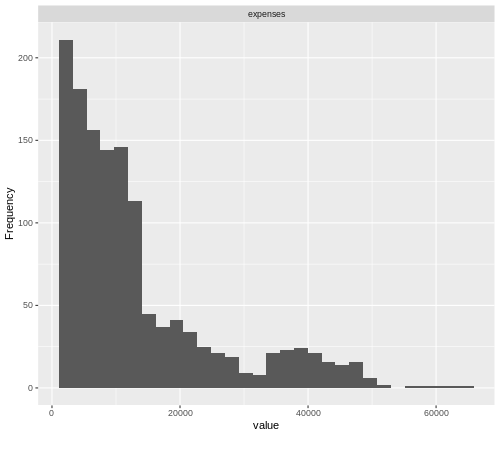

In [ ]:
%%R -w 500 -h 450 -u px
mf  |>
  dplyr::select(expenses)  |>
  plot_histogram()

In [ ]:
%%R
moments::skewness(mf$expenses, na.rm = TRUE)

[1] 1.51418


High positive value indicates that the distribution is highly skewed at right-hand sight, which means that in some individual have high expenses (\>20,000) in health insurance.

`plot_bar()` function from {DataExploer} package create frequency distribution of expenses, based on bmi, _catagories, sex, smoking and regions:

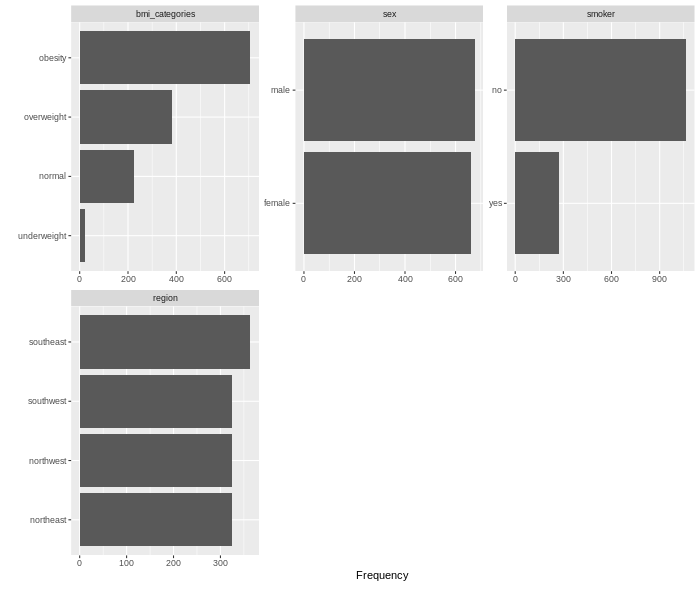

In [ ]:
%%R -w 700 -h 600 -u px
mf  |>
  dplyr::select(bmi_categories, sex, smoker, region)  |>
  plot_bar()

#### Split Data

In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(mf,.(bmi_categories, sex),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(mf, .(bmi_categories, sex),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

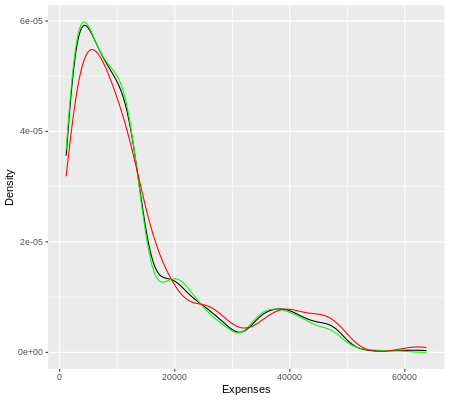

In [ ]:
%%R -w 450 -h 400
# Density plot all, train and test data
ggplot()+
  geom_density(data = mf, aes(expenses))+
  geom_density(data = train, aes(expenses), color = "green")+
  geom_density(data = test, aes(expenses), color = "red") +
      xlab("Expenses") +
     ylab("Density")


## Fit a Gamma Model in R






### Only Intercept model

First we will fit Gamma model with intercept-only. l. This means modeling the data with no predictors. For gamma models, this would mean estimating the shape and scale parameters of the data. Notice we set `link = "log".` This is in response to errors and warnings that we received when using `link = "identity"` and `link = "inverse"` to fit more complicated models

In [ ]:
%%R
# Fit the ordinal logistic regression model
inter.gamma<-glm(expenses ~ 1, data =train,
          family = Gamma(link = "log"))
summary(inter.gamma)


Call:
glm(formula = expenses ~ 1, family = Gamma(link = "log"), data = train)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.46533    0.02974   318.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.8244218)

    Null deviance: 728.98  on 931  degrees of freedom
Residual deviance: 728.98  on 931  degrees of freedom
AIC: 19454

Number of Fisher Scoring iterations: 5



From above output, we notice the null and residual deviance are identical. The null deviance always reports deviance for the intercept-only model.

If we exponentiate the intercept we get the overall mean of `expenses`.

In [ ]:
%%R
exp(coef(inter.gamma))

(Intercept) 
   12904.54 


In the Gamma family, the dispersion parameter can be estimated from the deviance and the degrees of freedom in the summary output.

In [ ]:
%%R
# Extract deviance and residual degrees of freedom from the model summary
deviance_val <- inter.gamma$deviance
residual_df <- inter.gamma$df.residua
# Calculate the dispersion parameter
dispersion_parameter <- deviance_val / residual_df
dispersion_parameter

[1] 0.7830084


We can also extract the estimated shape and scale parameters as follows:

In [ ]:
%%R
# shape: 1 divided by dispersion parameter
inter.gamma_shape <- 1/dispersion_parameter

# scale: mean/shape
inter.gamma_scale <- as.numeric(exp(coef(inter.gamma)))/inter.gamma_shape

Now let’s use the estimated shape and scale parameters to draw the estimated gamma distribution on top of a histogram of the observed data.

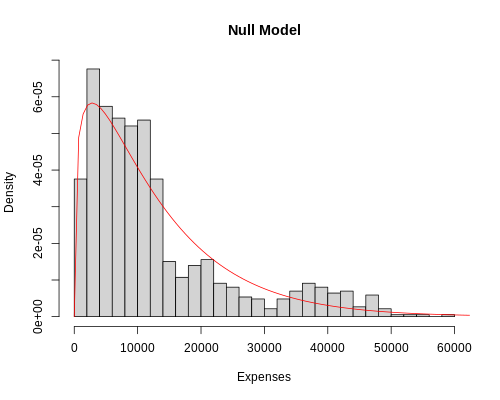

In [ ]:
%%R -w 500 -h 400 -u px
hist(train$expenses, breaks = 40, freq = FALSE,
     xlab = "Expenses",
     main= "Null Model")
curve(dgamma(x, shape = inter.gamma_shape ,
            scale = inter.gamma_scale ),
           from = 0, to = 70000, col = "red", add = TRUE, )

### Full Model

Now, let’s fit a Gamma regression model. We'll predict charges using age, sex, bmi_cra children, smoker, and region. We'll use a log link function to ensure the predicted values are positive.

In [ ]:
%%R
# Fit the gamma model
fit.gamma<-glm(expenses~bmi_categories + sex +  smoker + region + children + age,
               data= train,
              family = Gamma(link = "log"))



### Model Summary

In [ ]:
%%R
summary(fit.gamma)


Call:
glm(formula = expenses ~ bmi_categories + sex + smoker + region + 
    children + age, family = Gamma(link = "log"), data = train)

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               7.506578   0.196173  38.265  < 2e-16 ***
bmi_categoriesnormal      0.273121   0.192829   1.416  0.15700    
bmi_categoriesoverweight  0.295163   0.189897   1.554  0.12045    
bmi_categoriesobesity     0.428294   0.188581   2.271  0.02337 *  
sexmale                  -0.052456   0.045269  -1.159  0.24686    
smokeryes                 1.502742   0.057614  26.083  < 2e-16 ***
regionnorthwest          -0.084428   0.065172  -1.295  0.19549    
regionsoutheast          -0.192420   0.064621  -2.978  0.00298 ** 
regionsouthwest          -0.164759   0.065054  -2.533  0.01149 *  
children                  0.090770   0.019304   4.702 2.97e-06 ***
age                       0.027960   0.001627  17.182  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

### Check the Overall Model Fit

In [ ]:
%%R
anova(inter.gamma,fit.gamma)

Analysis of Deviance Table

Model 1: expenses ~ 1
Model 2: expenses ~ bmi_categories + sex + smoker + region + children + 
    age
  Resid. Df Resid. Dev Df Deviance      F    Pr(>F)    
1       931     728.98                                 
2       921     242.17 10   486.81 102.55 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


From the above output, you see that the chi-square is 242 and p = <0.0001. This means that you can reject the `null hypothesis` that the `model without predictors is as good as the model with the predictors`


### Report Model Summary

In [ ]:
%%R
report::report(fit.gamma)

We fitted a general linear model (Gamma family with a log link) (estimated
using ML) to predict expenses with bmi_categories, sex, smoker, region,
children and age (formula: expenses ~ bmi_categories + sex + smoker + region +
children + age). The model's explanatory power is substantial (Nagelkerke's R2
= 0.75). The model's intercept, corresponding to bmi_categories = underweight,
sex = female, smoker = no, region = northeast, children = 0 and age = 0, is at
7.51 (95% CI [7.14, 7.91], t(921) = 38.27, p < .001). Within this model:

  - The effect of bmi categories [normal] is statistically non-significant and
positive (beta = 0.27, 95% CI [-0.13, 0.63], t(921) = 1.42, p = 0.157; Std.
beta = 0.27, 95% CI [-0.13, 0.63])
  - The effect of bmi categories [overweight] is statistically non-significant
and positive (beta = 0.30, 95% CI [-0.10, 0.65], t(921) = 1.55, p = 0.120; Std.
beta = 0.30, 95% CI [-0.10, 0.65])
  - The effect of bmi categories [obesity] is statistically significant and
pos

`plot_model()` function of {sjPlot} package creates plots the estimates from logistic model:

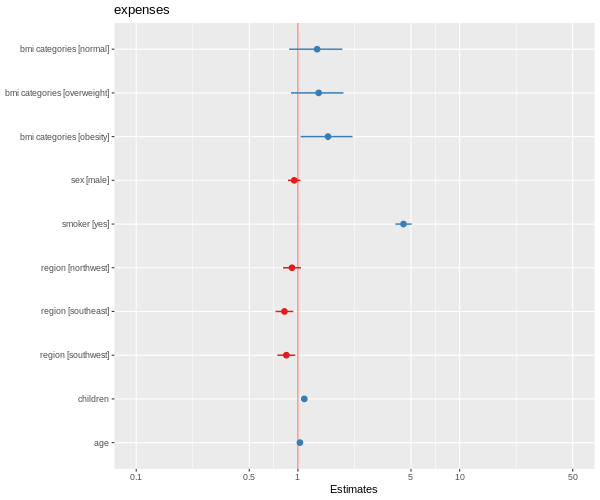

In [ ]:
%%R -w 600 -h 500 -u px
plot_model(fit.gamma, vline.color = "red")


### Shape and Scale of the Fitted Model

In [ ]:
%%R
# Calculate mean and variance of predicted values
predicted_mu <- fitted(fit.gamma)
mean_mu <- mean(predicted_mu)
var_mu <- var(predicted_mu)

# Estimate shape (k) and scale (theta)
shape_estimate <- mean_mu^2 / var_mu
scale_estimate <- var_mu / mean_mu

cat("Estimated shape (k):", shape_estimate, "\n")
cat("Estimated scale (theta):", scale_estimate, "\n")

Estimated shape (k): 1.064251 
Estimated scale (theta): 12695.67 


Now let’s use the estimated shape and scale parameters to draw the estimated gamma distribution on top of a histogram of the observed data.

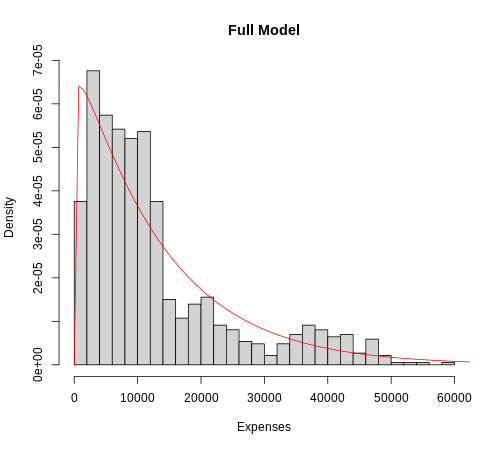

In [ ]:
%%R -w 500 -h 450 -u px
hist(train$expenses, breaks = 40, freq = FALSE,
     xlab = "Expenses",
     main= "Full Model")
curve(dgamma(x, shape = shape_estimate,
            scale = scale_estimate ),
           from = 0, to = 70000, col = "red", add = TRUE, )

### Model Performance

In [ ]:
%%R
performance::performance(fit.gamma)

# Indices of model performance

AIC       |      AICc |       BIC | Nagelkerke's R2 |     RMSE | Sigma
----------------------------------------------------------------------
18367.545 | 18367.884 | 18425.593 |           0.750 | 7746.727 | 0.689


### Marginal Effect

To calculate marginal effects and adjusted predictions, the `predict_response()` function of {ggeffects} package is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

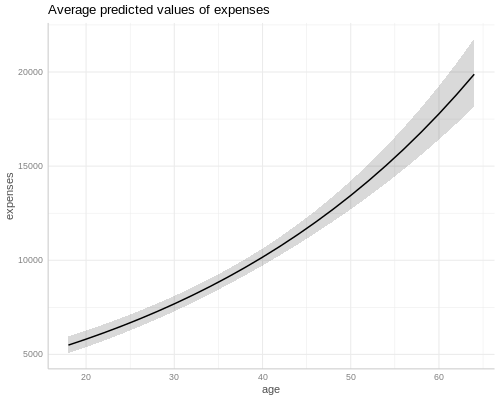

In [ ]:
%%R -w 500 -h 400 -u px
effect<-ggeffects::predict_response(fit.gamma, "age", margin = "empirical")
plot(effect)
effect.gamma<-ggeffects::predict_response(fit.gamma, "age", margin = "empirical")
plot(effect.gamma)

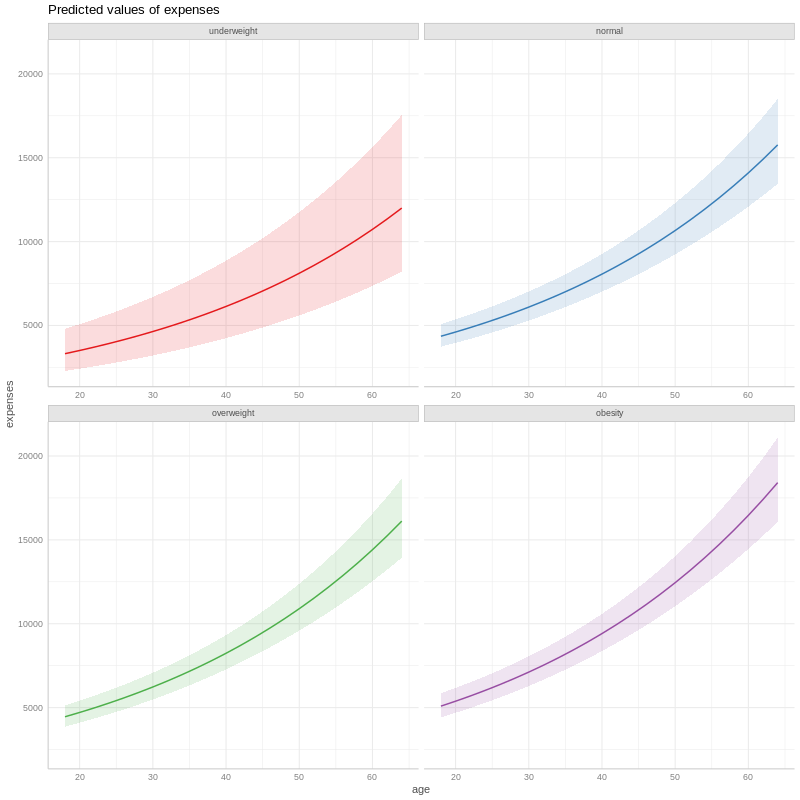

In [ ]:
%%R -w 800 -h 800 -u px
age.bmi <- predict_response(fit.gamma, terms = c("age", "bmi_categories"))
plot(age.bmi, facets = TRUE)

### Cross-validation

We’ll use 5-fold cross-validation to evaluate the model's predictive performance using the Mean Squared Error (MSE) as the metric.

In [ ]:
%%R
# Define MSE function
mse <- function(actual, predicted) {
  mean((actual - predicted)^2)
}

# Set up cross-validation
set.seed(42)
k_folds <- 5
folds <- sample(rep(1:k_folds, length.out = nrow(mf)))
mse_values <- numeric(k_folds)

for (i in 1:k_folds) {
  # Split data into training and validation sets
  train_index <- which(folds != i)
  test_index <- which(folds == i)

  train_data <- mf[train_index, ]
  test_data <- mf[test_index, ]

  # Fit the Gamma model on training data
  cv_model <- glm(expenses ~ age + sex + bmi_categories + children + smoker + region,
                  data = train_data,
                  family = Gamma(link = "log"))

  # Predict on the validation set
  predictions <- predict(cv_model, newdata = test_data, type = "response")

  # Calculate MSE for the fold
  mse_values[i] <- mse(test_data$expenses, predictions)
}

# Average MSE across all folds
average_mse_cv <- mean(mse_values)
cat("Average MSE from cross-validation:", average_mse_cv, "\n")

Average MSE from cross-validation: 63856032 


### Prediction at Test Data



The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.


In [ ]:
%%R
# Predict on the test set
test$Pred.gamma <- predict(fit.gamma, newdata = test, type = "response")


#### Prediction Performance

The {Matrics} package offers several useful functions to evaluate the performance of a regression model.

In [ ]:
%%R
RMSE<- Metrics::rmse(test$expenses, test$Pred.gamma)
MAE<- Metrics::mae(test$expenses, test$Pred.gamma)
MSE<- Metrics::mse(test$expenses, test$Pred.gamma)
MDAE<- Metrics::mdae(test$expenses, test$Pred.gamma)
print(peformance.matrics<-cbind("RMSE"=RMSE,
                                "MAE" = MAE,
                                "MSE" = MSE,
                                "MDAE" = MDAE))

        RMSE      MAE      MSE     MDAE
[1,] 7959.55 4564.622 63354434 1847.655


`geom_smooth()` using formula = 'y ~ x'


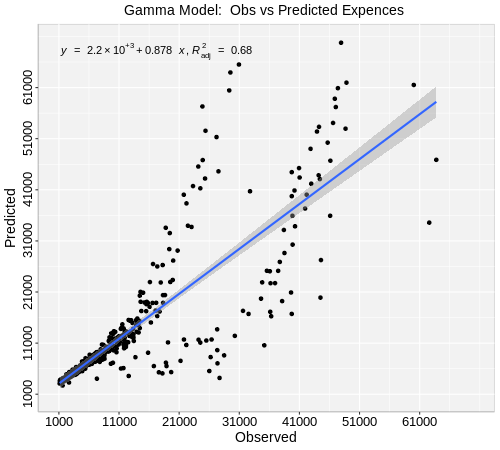

In [ ]:
%%R -h 450 -w 500 -u px
#install.packages("ggpmisc")
library(ggpmisc)
formula<-y~x

ggplot(test, aes(expenses,Pred.gamma)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Gamma Model:  Obs vs Predicted Expences ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(1000,70000), breaks=seq(1000, 70000, 10000))+
  scale_y_continuous(limits=c(1000,70000), breaks=seq(1000, 70000, 10000)) +
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### Log Linear model

It’s important to note that traditional linear modeling with a log transformation can be just as effective as gamma regression in some cases. To illustrate this, we’ll use the `lm()` function to fit a simple linear model with the total value log-transform. Oeef

In [ ]:
%%R
fit.lm<-glm(log(expenses)~bmi_categories + sex +  smoker + region + children + age,
               data= train)
summary(fit.lm)


Call:
glm(formula = log(expenses) ~ bmi_categories + sex + smoker + 
    region + children + age, data = train)

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               7.228502   0.128637  56.193  < 2e-16 ***
bmi_categoriesnormal      0.114645   0.126444   0.907 0.364809    
bmi_categoriesoverweight  0.175631   0.124521   1.410 0.158743    
bmi_categoriesobesity     0.300275   0.123658   2.428 0.015361 *  
sexmale                  -0.073391   0.029684  -2.472 0.013602 *  
smokeryes                 1.555938   0.037779  41.185  < 2e-16 ***
regionnorthwest          -0.092564   0.042735  -2.166 0.030569 *  
regionsoutheast          -0.185469   0.042374  -4.377 1.34e-05 ***
regionsouthwest          -0.144643   0.042658  -3.391 0.000727 ***
children                  0.109304   0.012658   8.635  < 2e-16 ***
age                       0.034409   0.001067  32.247  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



  original response scale. Standard errors are still on the transformed
  scale.



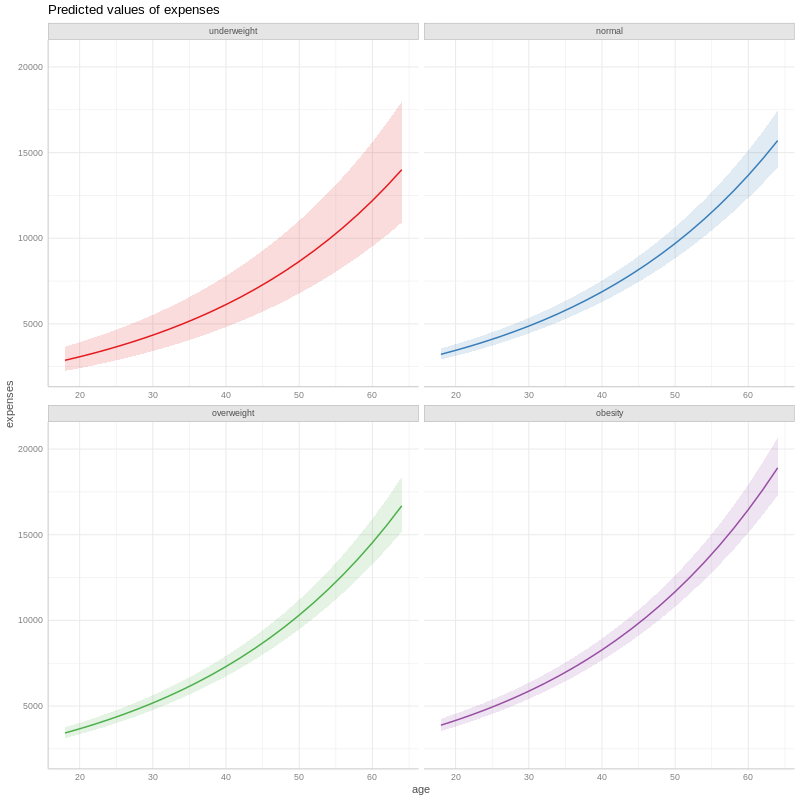

In [ ]:
%%R -w 800 -h 800 -u px
age.bmi.lm <- predict_response(fit.lm, terms = c("age", "bmi_categories"))
plot(age.bmi.lm, facets = TRUE)

## Summary and Conclusion

In this tutorial, we covered the essentials of Gamma regression in R, focusing on a manual approach and the implementation using R’s `glm()` function. We discussed when to use Gamma regression, particularly for non-negative, skewed data with increasing variance, which is common in finance, healthcare, environmental science, and engineering. Implementing Gamma regression from scratch helped us understand the model's mechanics, including the log-likelihood function and coefficient estimation. We then utilized R’s `glm()` function to fit a Gamma regression model more efficiently, emphasizing its simplicity in estimating parameters and interpreting output metrics like coefficients, standard errors, and goodness-of-fit measures. Gamma regression is vital for analyzing non-negative continuous data with a right-skewed distribution. With the knowledge gained in this tutorial, you can effectively apply Gamma regression to various real-world datasets, providing more accurate insights and predictions in fields such as claims costs, waiting times, and biological measurements.

## References

1.  [Getting Started with Gamma Regression](https://library.virginia.edu/data/articles/getting-started-with-gamma-regression)

2.  [Modeling skewed continuous outcome using Gamma family in glm()](https://rpubs.com/kaz_yos/glm-Gamma)

3.  [Lecture 8: Gamma regression](https://www.math.cit.tum.de/fileadmin/w00ccg/math/Forschung/forschungsgruppen/statistics/academics/lec8.pdf)